In [394]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib.patches import Arc
rc('animation', html='jshtml')
plt.style.use(['grayscale', 'seaborn-v0_8-white'])

In [395]:
# define a timestep 

dt = 0.01
num_steps = 10000 # the higher the number, the longer it runs
num_frames= 50 # higher the number, the closer the points

ref_time = 0

[array([-0.08019786, -0.06743531,  0.99449524])]
[-0.08019786 -0.06743531  0.99449524]


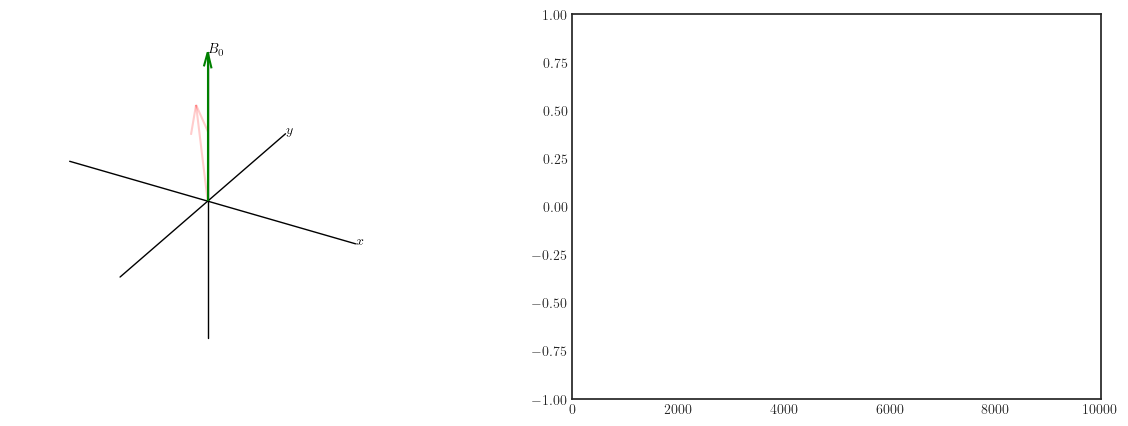

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121, projection='3d')

fid_signal = fig.add_subplot(122)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_aspect('equal')

fid_signal.set_xlim(0,num_steps)
fid_signal.set_ylim(-1,1)

# Remove background and grid
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)


plt.rcParams.update({
    # "pgf.texsystem": "pdflatex",
    "text.usetex": True,
    "font.family": "serif",
    # "pgf.rcfonts": False,
})
plt.savefig("plot.pgf")


L = 1.5
origin = np.array([0,0, 0])
# X axis
# X-axis
ax.plot3D([-L, L], [0, 0], [0, 0], color='black', linewidth=1)
# Y-axis
ax.plot3D([0, 0], [-L, L], [0, 0], color='black', linewidth=1)
# Z-axis
ax.plot3D([0, 0], [0, 0], [-L, L], color='black', linewidth=1)


# Axis labels at positive ends
ax.text(L, 0, 0, '$x$', color='black')
ax.text(0, L, 0, '$y$', color='black')
ax.text(0, 0, L, '$B_0$', color='black')


# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


ax.set_axis_off()


# Make a coil 

coil = [[],[],[]]

coil[0] = 0.4*np.cos(30*np.linspace(-1,1,1000))
coil[1] = np.linspace(-1,1,1000)
coil[2] = 0.4*np.sin(30*np.linspace(-1,1,1000))

# ax.plot(coil[0],coil[1],coil[2], color= 'black')


# Define a set of vectors that are all somewhat close to each other

# start off with a vector at 10 degrees 

num_vectors = 1
spread = 0.05


starting_angle = (90)*np.pi/180

individual_spins = [[0,0,1]+np.random.normal(loc=0, scale=spread,size=3) for i in range(num_vectors)]

individual_spins = [spin/np.linalg.norm(spin) for spin in individual_spins]

individual_ax = []

for i in range(num_vectors):
    individual_ax.append(ax.quiver(*origin, *individual_spins[i], color='r', alpha=0.2))


print(individual_spins)

net_magnetization = np.mean(individual_spins, axis=0)

print(net_magnetization)

draw_net_magnetization = ax.quiver(*origin, *net_magnetization, color = 'b', alpha = 0)

noise_vectors = [[0,0, np.random.normal(scale=0.2)] for i in range(num_vectors)]

strength_b_field = 6

b_field = strength_b_field*np.array([0,0,1])

b_0 = ax.quiver(*origin, *(b_field)/strength_b_field*1.5, color='g', arrow_length_ratio=0.1)

plt.show()
fig.savefig('setup.png', dpi=500)

In [ ]:
trajectory = [[],[],[]]

points,  = ax.plot(trajectory[0], trajectory[1], trajectory[2], color = 'r', alpha=0.3)
fid_points, = fid_signal.plot(trajectory[0], color='r')

# time_text = ax.text2D(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')



# instead of plotting every point plot every 10 points:


list_magnetization = []
list_individual = [[] for i in range(num_vectors)]
# Precalculate all the points 

In [388]:
field_inhomogeneity = 0.02

for i in range(int(num_steps)):
    circular_field = 5*np.array([np.cos(ref_time), 0, 0])
    for j in range(num_vectors):
        noise = [0,0,0]
        if(ref_time>10):
            circular_field = 0
            noise = noise_vectors[j]
            
        to_add = np.cross(individual_spins[j], b_field+circular_field+noise)*dt 
        
        new_vec = individual_spins[j]+to_add
        new_vec = new_vec/np.linalg.norm(new_vec)
        individual_spins[j]=new_vec
        list_individual[j].append(new_vec)
    
    net_magnetization = np.mean(individual_spins, axis=0)
    list_magnetization.append(net_magnetization)
    # vector = vector/np.linalg.norm(vector)
    
    trajectory[0].append(net_magnetization[0])
    trajectory[1].append(net_magnetization[1])
    trajectory[2].append(net_magnetization[2])
    
    ref_time+=dt
    # time_text.set_text(f'Time: {np.round(ref_time,2)} s')

In [389]:


# Now that everything is calcualted, all you need to do is truncate the list up to timestamp

def update(frame):
    global draw_net_magnetization, individual_ax
    global vector 
    global points
    global list_magnetization, list_individual
    global fid_points
    # global time_text
    global ref_time
    
    # global points
    if draw_net_magnetization in ax.collections:
        draw_net_magnetization.remove()
    for i in range(num_vectors):
        if individual_ax[i] in ax.collections:
            individual_ax[i].remove()
    # Now we need to add the continuous field but the frequency needs to be at the frequency of precession
    
    # How do we determine the frequency of precession in this case 
    
    
    # We set the larmor frequency to be 1, so the period will be 2π as expected, since f = 2π/T 
    
    # Now add the precession in the x axis 
    
    where_list = int(num_steps/num_frames*frame)
    
    points.set_data(trajectory[0][:where_list], trajectory[1][:where_list])
    points.set_3d_properties(trajectory[2][:where_list])
    
    
    if where_list>5:
        fid_points.set_data(np.arange(0, where_list, 1), trajectory[0][:where_list])
        
    draw_net_magnetization = ax.quiver(*origin, *(list_magnetization[where_list]), color='b')
    
    for i in range(num_vectors):
        individual_ax[i] = ax.quiver(*origin, *(list_individual[i][where_list]), color='r', alpha=0.2)
    
    # return [quiver, points, time_text]
    return [draw_net_magnetization, points, fid_points]


# interval defines delay between frames in milliseconds, not really relavant since we're just doing a numerical approximation for now

ani = FuncAnimation(fig, update, frames = num_frames, interval = 20, blit = True)

# ani

In [390]:
ani

In [358]:
# writer = animation.PillowWriter(fps=200)
# ani.save('larmor_precession.mp4', writer=writer)


FFwriter = animation.FFMpegFileWriter(fps=20, )
ani.save('t_2_relaxation.mp4', writer=FFwriter, dpi=300)

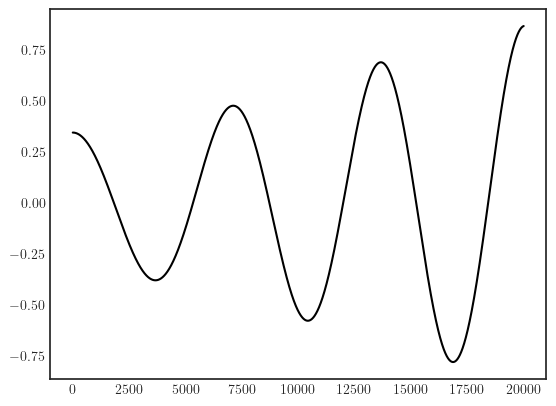